In [19]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf

In [21]:
def cinco_anos_atras():
    data_atual = datetime.now()
    data_inicio = data_atual - timedelta(days=365 * 5)
    # Formata a data de início como uma string no formato 'YYYY-MM-DD'
    return data_inicio.strftime('%Y-%m-%d')

In [36]:
def add_SA(tickers):
    return [ticker.upper() + ".SA" for ticker in tickers]
    

In [61]:
infra=add_SA(["xpid11", "bdif11", "ifra11"])
shopping=add_SA(["HSML11","XPML11","HGBS11","VISC11","MAXR11","HGRE11","MALL11"])
papel=add_SA(["HSAF11","KNCR11","KNHY11","BCRI11"])
logistica=add_SA(["XPIN11","HSLG11","HGLG11","XPLG11","PATL11","GALG11","VILG11"])
agro=add_SA(["BTAL11","VGIA11","FGAA11","RZAG11","XPCA11","KNCA11","BTRA11","RURA11"])

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  8 of 8 completed


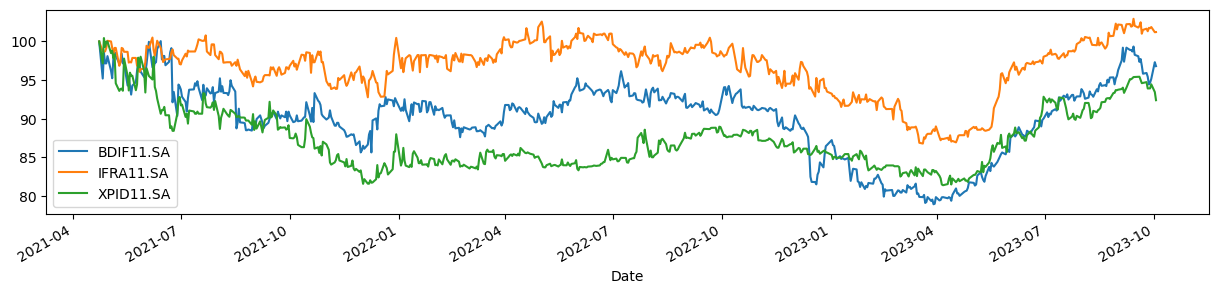

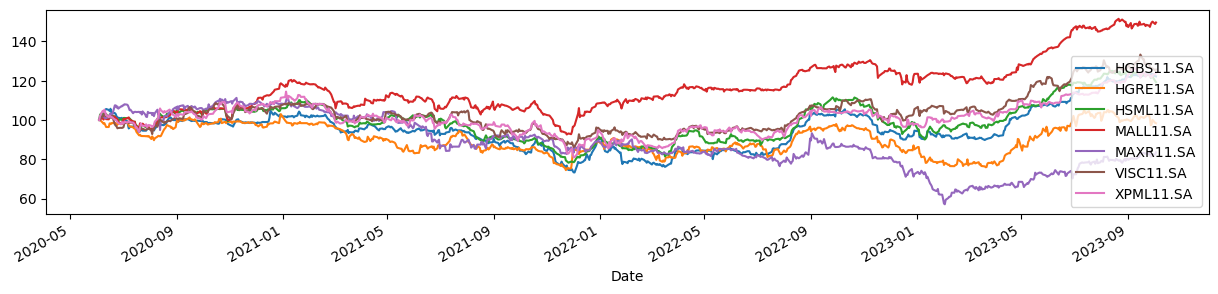

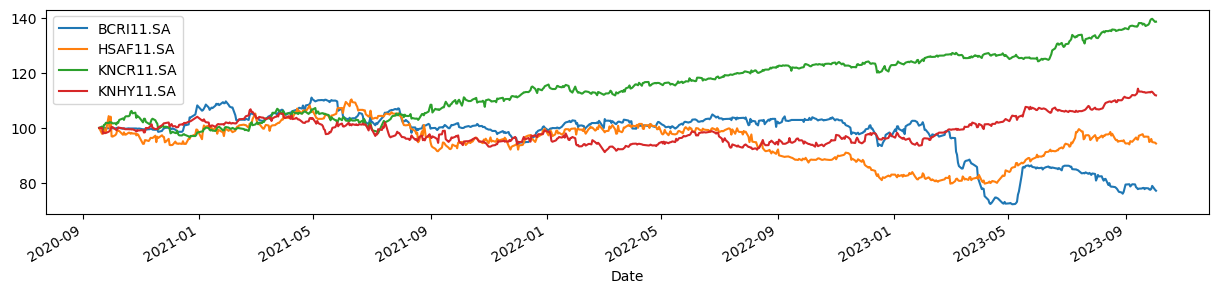

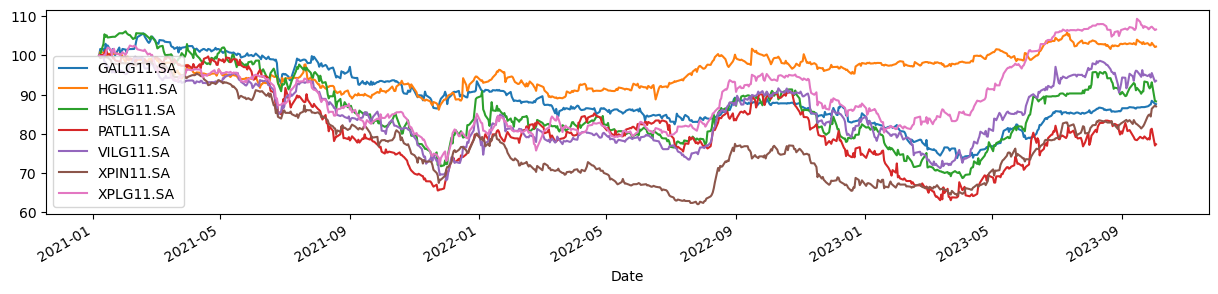

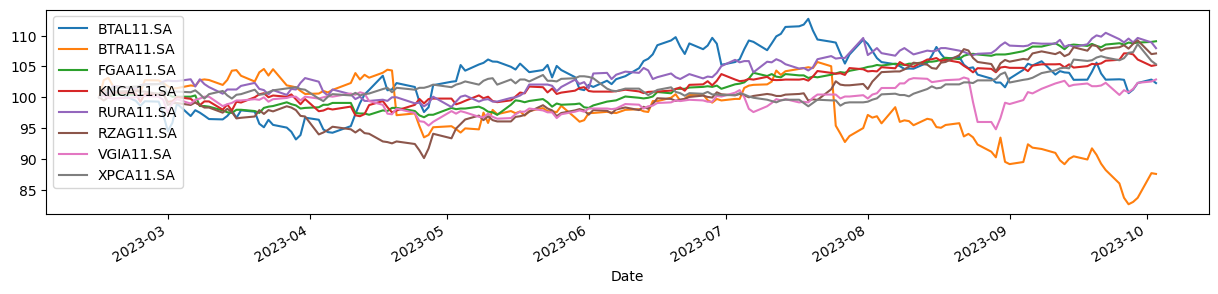

In [65]:
for tick in [infra,shopping,papel,logistica,agro]:
    carteira = yf.download(tick, start=cinco_anos_atras())['Adj Close'].dropna()
    # carteira ajustada base 100
    carteira_100 = (carteira / carteira.iloc[0] *100)
    carteira_100.plot(figsize=(15,3))

In [85]:
tickers=add_SA(["XPID11","VGIA11","HSML11","KNCR11","BDIF11","GALG11",
         "PATL11","HSLG11","BCRI11","RZAG11","HSAF11","BTRA11",
         "XPML11","XPCA11","MAXR11","IFRA11","RURA11","BTAL11",
         "VISC11","KNCA11","KNRI11","HGRU11","FGAA11"])

carteira = yf.download(tickers, start=cinco_anos_atras())['Adj Close'].dropna()

alocado=[6.28,4.06,3.66,3.39,3.22,
         3.13,3.04,2.88,2.77,2.43,
         2.34,2.10,1.55,1.45,1.38,
         1.34,1.21,0.84,0.72,0.26,
         0.10,0.08,0.06]


alocacao= np.array(alocado) /100


[*********************100%***********************]  23 of 23 completed


In [74]:
POUPANCA=0.6248
SELIC=12.75
TOTAL_DIAS_NEGOCIACAO=252
COMPARAR_MERCADO="DIVO11.SA"

In [140]:
retorno_seguranca = np.log(carteira / carteira.shift(1))
retorno_seguranca[tickers].var() * 252 *100
a *100

XPID11.SA    1.218094
VGIA11.SA    1.463485
HSML11.SA    1.099203
KNCR11.SA    0.433260
BDIF11.SA    1.293257
GALG11.SA    1.116468
PATL11.SA    6.726681
HSLG11.SA    3.394082
BCRI11.SA    4.160750
RZAG11.SA    1.347118
HSAF11.SA    1.973021
BTRA11.SA    5.899492
XPML11.SA    1.518452
XPCA11.SA    0.731420
MAXR11.SA    4.358104
IFRA11.SA    1.019740
RURA11.SA    1.301758
BTAL11.SA    3.608954
VISC11.SA    1.889733
KNCA11.SA    0.940545
KNRI11.SA    1.660274
HGRU11.SA    1.985943
FGAA11.SA    0.430627
dtype: float64

In [118]:
cov_matrix = retorno_seguranca.cov()
cov_matrix_a = retorno_seguranca.cov() *TOTAL_DIAS_NEGOCIACAO
corr_matrix = retorno_seguranca.corr()
corr_matrix

,BCRI11.SA,BDIF11.SA,BTAL11.SA,BTRA11.SA,FGAA11.SA,GALG11.SA,HGRU11.SA,HSAF11.SA,HSLG11.SA,HSML11.SA,...,KNRI11.SA,MAXR11.SA,PATL11.SA,RURA11.SA,RZAG11.SA,VGIA11.SA,VISC11.SA,XPCA11.SA,XPID11.SA,XPML11.SA
BCRI11.SA,1.000000,-0.010087,-0.001397,0.015857,0.274499,0.178660,0.052100,0.112998,0.181145,0.054843,...,0.050731,0.044069,0.209161,0.159838,0.188108,0.141156,0.077046,0.178585,0.178472,-0.018586
BDIF11.SA,-0.010087,1.000000,0.191616,0.157496,0.093559,-0.020133,-0.182748,0.077245,0.004988,-0.056734,...,-0.000186,0.091658,0.067295,0.010808,0.093191,0.059411,0.075117,-0.047025,0.153582,0.159420
BTAL11.SA,-0.001397,0.191616,1.000000,0.173760,0.089557,0.161776,0.038036,0.102100,0.086547,0.128082,...,0.071391,0.043972,0.115120,0.054308,0.117347,0.110408,0.054180,-0.000285,0.045519,0.165539
BTRA11.SA,0.015857,0.157496,0.173760,1.000000,0.048417,-0.070320,-0.137196,0.112223,-0.124315,-0.061808,...,0.023203,0.099425,-0.049938,0.006636,-0.131362,0.022295,0.024904,-0.088889,0.058087,0.118315
FGAA11.SA,0.274499,0.093559,0.089557,0.048417,1.000000,0.000854,-0.000631,0.041996,-0.022196,0.035596,...,0.004462,0.012862,0.063872,-0.038731,0.160434,0.080150,-0.035627,0.050534,0.042593,0.217902
GALG11.SA,0.178660,-0.020133,0.161776,-0.070320,0.000854,1.000000,-0.080491,0.118611,0.300389,0.045100,...,0.118186,0.002244,0.182817,-0.045008,0.220449,0.089490,0.047040,0.128986,0.151261,-0.042419
HGRU11.SA,0.052100,-0.182748,0.038036,-0.137196,-0.000631,-0.080491,1.000000,0.097294,0.196134,0.134934,...,0.289667,0.055842,0.188227,0.070007,0.080436,-0.129796,0.157917,0.186580,0.034159,-0.033374
HSAF11.SA,0.112998,0.077245,0.102100,0.112223,0.041996,0.118611,0.097294,1.000000,0.354647,0.123075,...,0.232749,0.012427,0.248101,0.228572,0.319896,0.104994,0.065065,0.210209,0.198594,-0.033418
HSLG11.SA,0.181145,0.004988,0.086547,-0.124315,-0.022196,0.300389,0.196134,0.354647,1.000000,0.241917,...,0.188369,0.067512,0.255502,0.119748,0.391759,0.087671,0.149304,0.342443,0.199805,-0.028306
HSML11.SA,0.054843,-0.056734,0.128082,-0.061808,0.035596,0.045100,0.134934,0.123075,0.241917,1.000000,...,0.051082,0.118584,0.181691,0.153089,0.070969,0.003979,0.177910,0.125839,0.021148,0.270157


In [130]:
cart_var = (np.dot(alocacao.T, (np.dot(retorno_seguranca.cov() *TOTAL_DIAS_NEGOCIACAO, alocacao))))
cart_vol = (np.dot(alocacao.T, (np.dot(retorno_seguranca.cov() *TOTAL_DIAS_NEGOCIACAO, alocacao)))) ** 0.5
print(f"Risco (volatividade) da Carteira: {round(cart_vol, 2) *100}%")

Risco (volatividade) da Carteira: 3.0%


In [132]:
#markowitz
log_returns= np.log(carteira / carteira.shift(1))
log_returns.mean() * TOTAL_DIAS_NEGOCIACAO

BCRI11.SA   -0.367475
BDIF11.SA    0.273658
BTAL11.SA    0.030083
BTRA11.SA   -0.212569
FGAA11.SA    0.138825
GALG11.SA    0.174032
HGRU11.SA    0.296257
HSAF11.SA    0.244240
HSLG11.SA    0.306241
HSML11.SA    0.357674
IFRA11.SA    0.142190
KNCA11.SA    0.083423
KNCR11.SA    0.147588
KNRI11.SA    0.341732
MAXR11.SA    0.408891
PATL11.SA    0.222620
RURA11.SA    0.125385
RZAG11.SA    0.109631
VGIA11.SA    0.045526
VISC11.SA    0.301585
XPCA11.SA    0.083192
XPID11.SA    0.155974
XPML11.SA    0.328306
dtype: float64